# 1. 1차원데이터분석

1. 변수종류파악( 수치형/ 범주형/ 시간형)

2. 변수종류별분석지표( 수치형/ 범주형/ 시간형)

3. 시각화 : 도수분포표/ 히스토그램/ 상자그림


# 2. 2차원데이터분석

1.상관계수

2.시각화 : 산점도/ 회귀직선/ 히트맵

# 항공사 지연요인 데이터 탐색적 분석

출처 : https://www.kaggle.com/datasets/pitterman/airline-stats



- airline : 항공사
- carrier_deay : 항공사 지연 요인
- atc_delay : ATC 항공교통관제 지연 요인
- weather_delay : 날씨로 인한 지연 요인

In [29]:
import pandas as pd
df= pd.read_csv('./data/airline_stats.csv')
df.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


pct_carrier_delay   항공사 지연요인
pct_atc_delay       관제 지연요인
pct_weather_delay   날씨 지연요인

In [31]:
df.airline.unique()

array(['American', 'Alaska', 'Jet Blue', 'Delta', 'United', 'Southwest'],
      dtype=object)

In [32]:
df['airline'].value_counts()

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

총 6개 항공사의 데이터를 포함하고 있으며,
그 중 DELTA가 9107건으로 가장 많고, AMERICAN, SOUTHWEST, UNITED 순으로 5천건 수준이다. 

In [33]:
# statistical summary
df.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [34]:
# 항공사별 통계량 확인
df.groupby('airline')['pct_carrier_delay'].describe().T

airline,Alaska,American,Delta,Jet Blue,Southwest,United
count,3851.000000,5723.000000,9095.000000,3773.000000,5584.000000,5414.000000
mean,3.521889,9.042180,6.333460,8.081843,7.521997,7.398833
std,2.483224,4.139067,4.695292,3.797737,3.345085,5.369283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.935484,6.338538,3.813989,5.341176,5.070294,4.034708
50%,3.225806,8.428571,5.548387,7.657895,6.960930,6.445210
75%,4.685599,10.988763,7.821952,10.280000,9.354839,9.633110
max,22.290323,50.000000,100.000000,28.000000,24.800000,100.000000


In [35]:
df.groupby('airline')['pct_atc_delay'].describe().T

airline,Alaska,American,Delta,Jet Blue,Southwest,United
count,3851.000000,5723.000000,9095.000000,3773.000000,5584.000000,5414.000000
mean,5.472672,5.993529,4.462978,7.345231,3.147019,5.348133
std,5.699303,4.647170,4.364335,5.227372,2.513162,4.992464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.878614,3.108403,1.818182,3.784314,1.612527,2.431308
50%,3.776860,4.986523,3.508108,6.136905,2.559242,4.353647
75%,7.001330,7.594450,5.839901,9.612903,3.790421,7.030109
max,54.838710,60.000000,100.000000,40.986111,21.542722,100.000000


In [28]:
df.groupby('airline')['pct_weather_delay'].describe().T

airline,Alaska,American,Delta,Jet Blue,Southwest,United
count,3851.000000,5725.000000,9107.000000,3775.000000,5584.000000,5426.000000
mean,0.513497,1.122528,0.679868,0.465080,0.512611,0.679191
std,1.136494,1.097819,1.092813,0.764020,0.649631,1.337334
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.296296,0.000000,0.000000,0.105675,0.000000
50%,0.000000,0.884250,0.315245,0.157290,0.305598,0.262030
75%,0.497395,1.641558,0.892582,0.666667,0.663306,0.859789
max,14.633803,12.500000,20.500000,9.923077,6.240987,33.333333


In [ ]:
import matplotlib.pyplot as plt

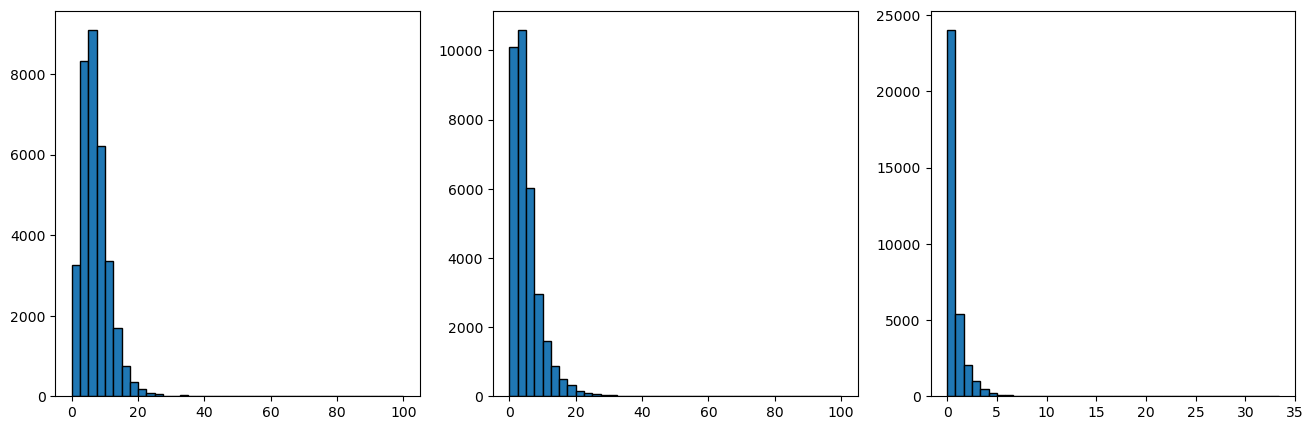

In [40]:
fig = plt.figure(figsize=(16,5))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.hist(df['pct_carrier_delay'], bins=40, edgecolor='black')
ax2.hist(df['pct_atc_delay'], bins=40, edgecolor='black')
ax3.hist(df['pct_weather_delay'], bins=40, edgecolor='black')
plt.show()

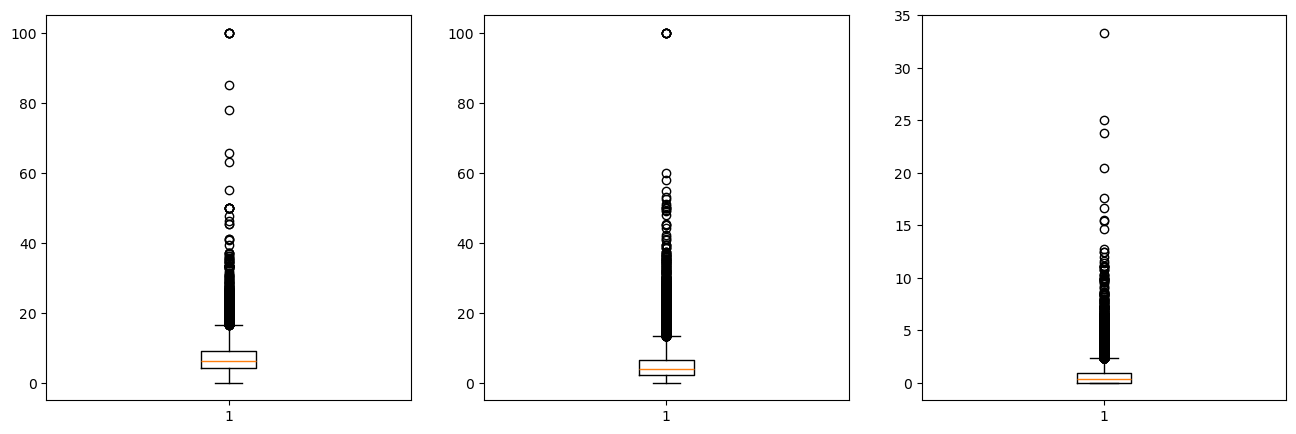

In [43]:
fig = plt.figure(figsize=(16,5))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.boxplot(df['pct_carrier_delay'].dropna())
ax2.boxplot(df['pct_atc_delay'].dropna())
ax3.boxplot(df['pct_weather_delay'].dropna())
plt.show()

In [44]:
import seaborn as sns

<Axes: xlabel='airline', ylabel='pct_carrier_delay'>

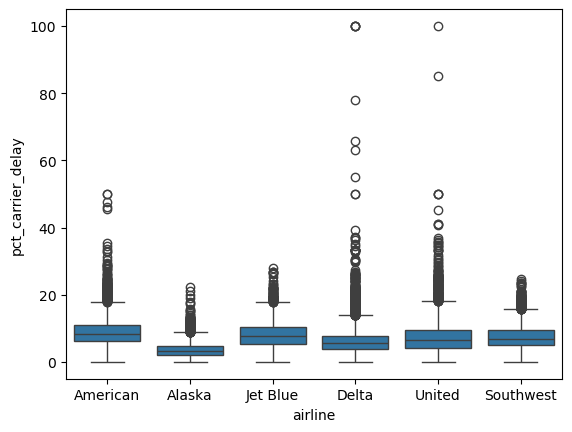

In [46]:
sns.boxplot(df, x='airline', y='pct_carrier_delay')

<Axes: xlabel='airline', ylabel='pct_atc_delay'>

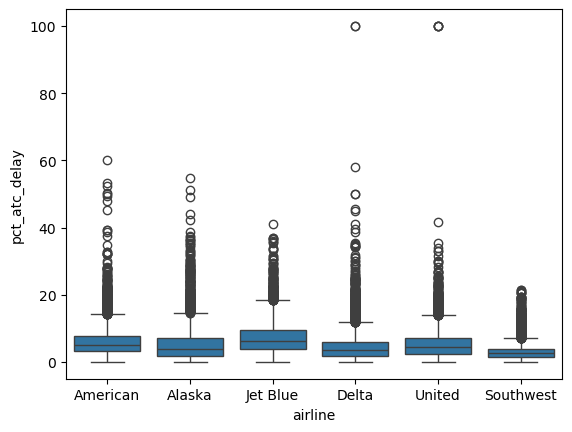

In [47]:
sns.boxplot(df, x='airline', y='pct_atc_delay')

<Axes: xlabel='airline', ylabel='pct_weather_delay'>

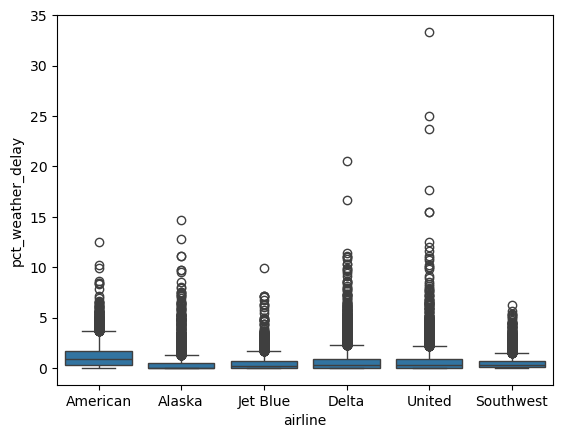

In [48]:
sns.boxplot(x='airline', y='pct_weather_delay', data=df)

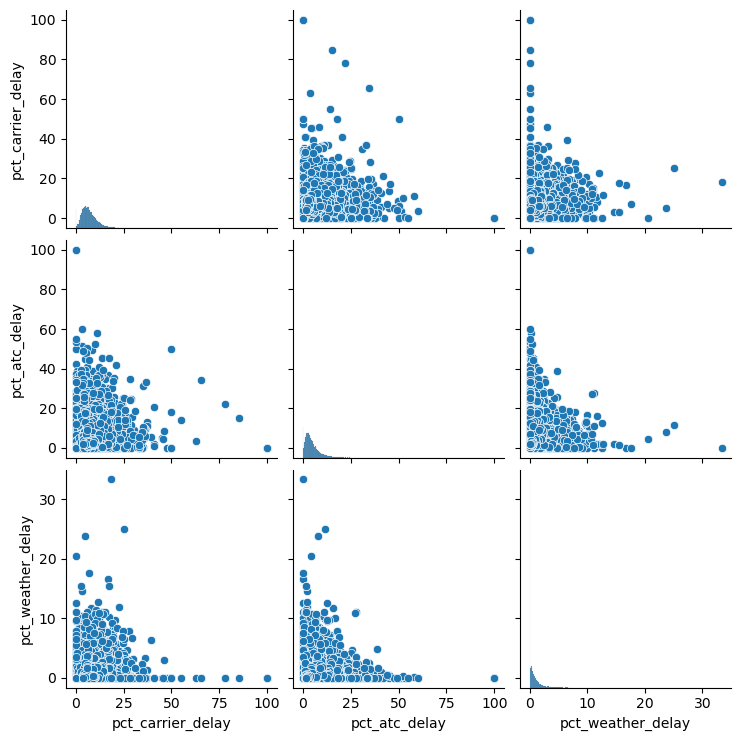

In [50]:
sns.pairplot(df.select_dtypes(include='number'))

<Axes: >

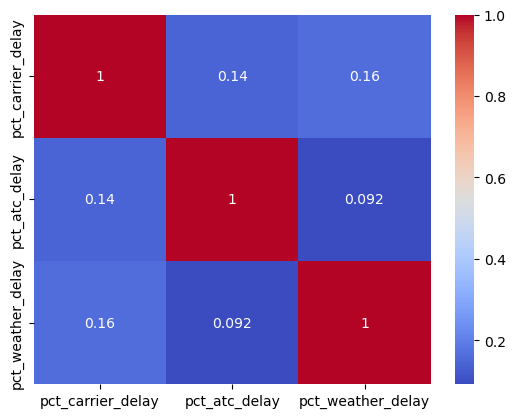

In [49]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [11]:
# 결측치 확인
df.isnull().sum()

pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64

In [51]:
df_clean = df.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33440 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33440 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


In [12]:
# 결측치
df[df.isnull().any(axis=1)]

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
4809,NaN,NaN,NaN,Jet Blue
6123,NaN,NaN,NaN,Jet Blue
7069,NaN,NaN,NaN,Delta
9241,NaN,NaN,NaN,Delta
12081,NaN,NaN,NaN,United
12541,NaN,NaN,NaN,United
13058,NaN,NaN,NaN,United
13534,NaN,NaN,NaN,United
13547,NaN,NaN,NaN,United
13996,NaN,NaN,NaN,United


In [19]:
# 결측치를 0으로 대체
df_new = df.fillna(0)
df_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33468 non-null  float64
 1   pct_atc_delay      33468 non-null  float64
 2   pct_weather_delay  33468 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33468 non-null  float64
 1   pct_atc_delay      33468 non-null  float64
 2   pct_weather_delay  33468 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB
